In [80]:
# stephanie's sandbox
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [63]:
def clean_raw_data(clean_df, raw_data_file, skip):
    raw_data = pd.read_csv(raw_data_file, sep='\t', header=None, skiprows=skip, encoding='latin-1')
    data_col = raw_data[0]

    for row in range(0, len(data_col)):

        data_row = list(map(str, data_col[row].split())) # reformat to make string into list delimited by spaces
        
        add_row = {} # initialize, and clear dictionary for each row

        for i in range(0, len(data_row)):
            add_row = {'year': data_row[0], 
                    'month': data_row[1],
                    'timestamp': pd.Timestamp(year=int(data_row[0]), month=int(data_row[1]), day=1),
                    'monthly_anom': data_row[2],
                    'monthly_unc': data_row[3], 
                    'one_yr_anom': data_row[4], 
                    'one_yr_unc': data_row[5]}

        clean_df = clean_df._append(add_row, ignore_index=True) # append is being depricated, todo: use concat or merge

    # cast year and  month as  int - todo, make timestamp
    clean_df['year'] = clean_df['year'].astype(int)
    clean_df['month'] = clean_df['month'].astype(int)

    # cast weather data (columns 2-5) as floats
    clean_df['monthly_anom'] = clean_df['monthly_anom'].astype(float)
    clean_df['monthly_unc'] = clean_df['monthly_unc'].astype(float)
    clean_df['one_yr_anom'] = clean_df['one_yr_anom'].astype(float)
    clean_df['one_yr_unc'] = clean_df['one_yr_unc'].astype(float)

    # filter data to years after 1920
    clean_df = clean_df[clean_df['year'] >= 1920]

    # add timestamp column
  
    return clean_df

In [71]:
def get_season_df(df, season):
    summer_months = [1, 2, 12]
    autumn_months = [3, 4, 5]
    winter_months = [6, 7, 8]
    spring_months = [9, 10,11]

    if season == 'summer':
        season_df = df[df['month'].isin(summer_months)]
    elif season == 'autumn':
        season_df = df[df['month'].isin(autumn_months)]
    elif season == 'winter':
        season_df = df[df['month'].isin(winter_months)]
    elif season == 'spring':
        season_df = df[df['month'].isin(spring_months)]
    else: 
        print('Invalid season')
        return df

    return season_df

In [64]:
# files and constants
south_america_file = 'SouthAmerica_raw.txt'
lima_file = 'Lima_Peru_raw.txt'
santiago_file = 'Santiago_Chile_raw.txt'
saopaulo_file = 'SaoPaulo_Brazil_raw.txt'

weather_cols = ['year', 'month', 'monthly_anom', 'monthly_unc', 'one_yr_anom', 'one_yr_unc']


In [72]:
# clean data
south_data = pd.DataFrame(columns=weather_cols)
south_data = clean_raw_data(south_data, south_america_file, 71)

lima_data = pd.DataFrame(columns=weather_cols)
lima_data = clean_raw_data(lima_data, lima_file, 71)

santiago_data = pd.DataFrame(columns=weather_cols)
santiago_data = clean_raw_data(santiago_data, santiago_file, 69)

saopaulo_data = pd.DataFrame(columns=weather_cols)
saopaulo_data = clean_raw_data(saopaulo_data, saopaulo_file, 69)

In [79]:
lima_data.describe()

,year,month,monthly_anom,monthly_unc,one_yr_anom,one_yr_unc
count,1212.000000,1212.000000,1212.000000,1212.000000,1206.000000,1206.000000
mean,1970.000000,6.500000,0.114011,0.339507,0.107731,0.178206
std,29.166794,3.453478,0.544916,0.171055,0.444255,0.097318
min,1920.000000,1.000000,-1.420000,0.078000,-0.861000,0.038000
25%,1945.000000,3.750000,-0.271000,0.235000,-0.205000,0.119000
50%,1970.000000,6.500000,0.068000,0.300000,0.059000,0.152500
75%,1995.000000,9.250000,0.435000,0.392000,0.418750,0.194750
max,2020.000000,12.000000,2.072000,1.852000,1.508000,0.656000


In [84]:
# get season data

# summer
south_america_summer = get_season_df(south_data, 'summer')
lima_summer = get_season_df(lima_data, 'summer')
santiago_summer = get_season_df(santiago_data, 'summer')
saopaulo_summer = get_season_df(saopaulo_data, 'summer')

# autumn
south_america_autumn = get_season_df(south_data, 'autumn')
lima_autumn = get_season_df(lima_data, 'autumn')
santiago_autumn = get_season_df(santiago_data, 'autumn')
santiago_autumn = get_season_df(santiago_data, 'autumn')

# winter
south_america_winter = get_season_df(south_data, 'winter')
lima_winter = get_season_df(lima_data, 'winter')
santiago_winter = get_season_df(santiago_data, 'winter')
santiago_winter = get_season_df(santiago_data, 'winter')

# spring
south_america_spring = get_season_df(south_data, 'spring')
lima_spring = get_season_df(lima_data, 'spring')
santiago_spring = get_season_df(santiago_data, 'spring')
santiago_spring = get_season_df(santiago_data, 'spring')

<Axes: xlabel='timestamp', ylabel='one_yr_anom'>

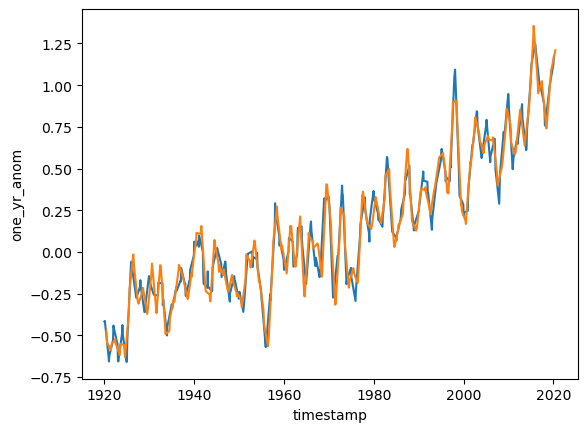

In [95]:
sns.lineplot(x='timestamp', y='one_yr_anom', data=south_america_summer)
sns.lineplot(x='timestamp', y='one_yr_anom', data=south_america_winter)


<Axes: xlabel='timestamp', ylabel='one_yr_anom'>

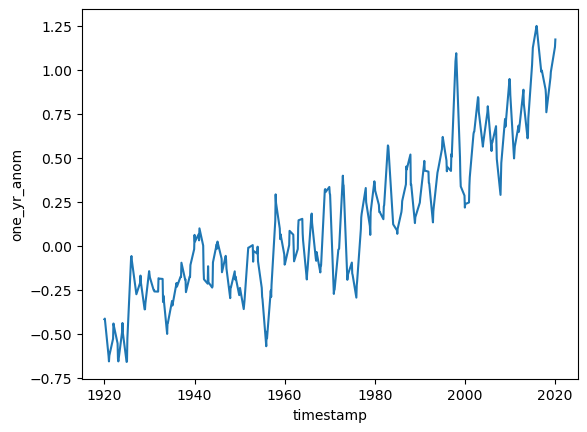

In [83]:
sns.lineplot(x='timestamp', y='one_yr_anom', data=south_america_summer)
# # sns.lineplot(x='timestamp', y='one_yr_anom', data=south_data)
# sns.lineplot(x='timestamp', y='one_yr_anom', data=lima_summer)
# sns.lineplot(x='timestamp', y='one_yr_anom', data=santiago_summer)
# sns.lineplot(x='timestamp', y='one_yr_anom', data=saopaulo_summer)


### Testing Cells Below

In [116]:
df_south_america_import = pd.read_csv(south_america_file, sep='\t', header=None, skiprows=71)
# df_south_america_import
sa_col= df_south_america_import[0]
sa_col[0]


'  1856     1    -0.121  0.826       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN'

In [117]:
# make data frame
weather_cols = ['year', 'month', 'monthly_anom', 'monthly_unc', 'one_yr_anom', 'one_yr_unc', 'five_yr_anom', 'five_yr_unc', 'ten_yr_anom', 'ten_yr_unc', 'twenty_yr_anom', 'twenty_yr_unc']
df_sa = pd.DataFrame(columns=weather_cols)

for row in range(0, len(sa_col)):
    test = list(map(str, sa_col[row].split()))

    add_row = {}

    for i in range(0,len(test)):
        add_row = {'year': test[0], 
                'month': test[1],
                'monthly_anom': test[2],
                'monthly_unc': test[3], 
                'one_yr_anom': test[4], 
                'one_yr_unc': test[5], 
                'five_yr_anom': test[6], 
                'five_yr_unc': test[7], 
                'ten_yr_anom': test[8], 
                'ten_yr_unc': test[9], 
                'twenty_yr_anom': test[10], 
                'twenty_yr_unc': test[11]}
        
    df_sa = df_sa._append(add_row, ignore_index=True)
    
display(df_sa)


,year,month,monthly_anom,monthly_unc,one_yr_anom,one_yr_unc,five_yr_anom,five_yr_unc,ten_yr_anom,ten_yr_unc,twenty_yr_anom,twenty_yr_unc
0,1856,1,-0.121,0.826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1856,2,-1.078,1.205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1856,3,-1.080,0.890,-0.834,0.373,NaN,NaN,NaN,NaN,NaN,NaN
3,1856,4,-0.524,0.856,-0.850,0.381,NaN,NaN,NaN,NaN,NaN,NaN
4,1856,5,-0.950,0.913,-0.824,0.386,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1975,2020,8,1.344,0.213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976,2020,9,1.514,0.182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1977,2020,10,1.636,0.208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1978,2020,11,1.182,0.208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
